In [1]:
%cd pipeline

dfloaders = {}


/datc/imp/notebooks/pipeline


In [13]:

def get_dfloader(conf, file):
    global dfloaders
    if file in dfloaders.keys():
        return dfloaders[file]
    %run helpers/load_data.ipynb
    config_select.value = conf
    file_select.value = file
    dfloaders[file] = dfloader
    return dfloader

In [14]:
targets = [
    {
        "conf": "knmi",
        "file": "344 Rotterdam.csv",
        "target": ["Temperature"],
        "features": [
            ["Temperature"],
            ["Global Radiation"],
            ["Dew Temperature"],
            ["Relative atmospheric humidity"]
        ]
    },
    {
        "conf": "knmi",
        "file": "344 Rotterdam.csv",
        "target": ["Relative atmospheric humidity"],
        "features": [
            ["Relative atmospheric humidity"],
            ["Sunshine duration"],
            ["Global Radiation"],
            ["Horizontal visibility"]
        ]
    },
    {
        "conf": "knmi",
        "file": "344 Rotterdam.csv",
        "target": ["Global Radiation"],
        "features": [
            ["Global Radiation"],
            ["Relative atmospheric humidity"],
            ["Temperature"],
            ["Sunshine duration"]
        ]
    },
    {
        "conf": "factory zero",
        "file": "054.xlsx",
        "target": ["alklimaHeatPump", "flow_temp"],
        "features": [
            ["alklimaHeatPump", "flow_temp"],
            ["alklimaHeatPump", "return_temp"],
            ["energyHeatpump", "power"]
        ]
    },
    {
        "conf": "factory zero",
        "file": "054.xlsx",
        "target": ["alklimaHeatPump", "op_mode"],
        "features": [
            ["alklimaHeatPump", "op_mode"],
            ["ventilation", "outdoor_temp"]
        ]
    },
    {
        "conf": "factory zero",
        "file": "054.xlsx",
        "target": ["smartMeter", "power"],
        "features": [
            ["smartMeter", "power"],
            ["ventilation", "outdoor_temp"],
            ["ventilation", "room_temp"],
            ["solar", "power"]
        ]
    },
    {
        "conf": "factory zero",
        "file": "054.xlsx",
        "target": ["co2sensor", "co2"],
        "features": [
            ["co2sensor", "co2"],
            ["co2sensor", "voc"],
        ]
    }
]

In [15]:
for it in targets:
    dfloader = get_dfloader(it["conf"], it["file"])
    target = it['target'] if len(it['target']) == 2 else ['0', it['target'][0]]
    dfloader.add_targets(target[1], sheet_name=target[0])
    for feature in it['features']:
        feature = feature if len(feature) == 2 else ['0', feature[0]]
        dfloader.add_features(feature[1], sheet_name=feature[0])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrices = {}

for file in dfloaders.keys():
    corr_matrices[file] = dfloaders[file].df.corr()

In [22]:
for it in targets:
    df = pd.DataFrame()
    target = it["target"]
    target_label = target[0] if len(target) == 1 else f'{target[0]}_{target[1]}'
    for feature in it["features"]:
        feature_label = feature[0] if len(feature) == 1 else f'{feature[0]}_{feature[1]}'
        if feature_label == target_label:
            continue
        mat = corr_matrices[it["file"]]
        df.loc[(target_label, feature_label)] = mat.loc[(target_label, feature_label)]
    display(df)

,Global Radiation,Dew Temperature,Relative atmospheric humidity
Temperature,0.539893,0.871065,-0.511679


,Sunshine duration,Global Radiation,Horizontal visibility
Relative atmospheric humidity,-0.652761,-0.704729,-0.66539


,Relative atmospheric humidity,Temperature,Sunshine duration
Global Radiation,-0.704729,0.539893,0.781369


,alklimaHeatPump_return_temp,energyHeatpump_power
alklimaHeatPump_flow_temp,0.945847,0.810512


,ventilation_outdoor_temp
alklimaHeatPump_op_mode,-0.480052


,ventilation_outdoor_temp,ventilation_room_temp,solar_power
smartMeter_power,-0.536733,-0.373998,0.865713


,co2sensor_voc
co2sensor_co2,0.442207


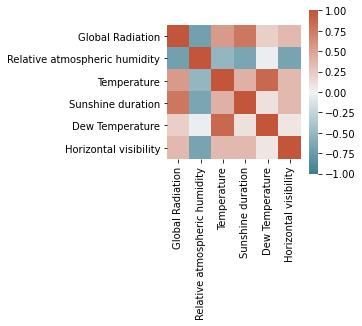

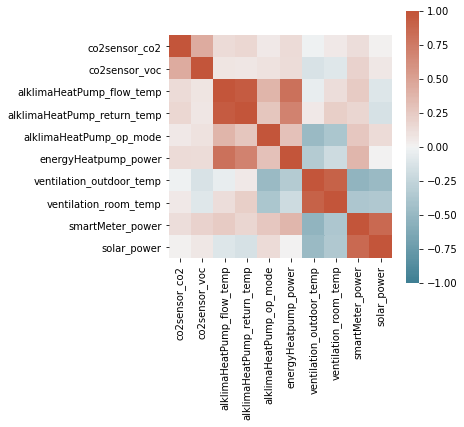

In [18]:
for key, mat in corr_matrices.items():
    plt.figure(figsize=(len(mat.columns) / 2, len(mat.columns) / 2))
    sns.heatmap(
        mat,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(220, 20, n=200),
        square=True
        )
    plt.show()